In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

In [7]:

# Load your data
data1 = pd.read_csv('output.csv')
data2 = pd.read_csv('y_hat_results_M2.csv')


In [8]:
data1 = pd.read_csv('output.csv', header=None,)
data2 = pd.read_csv('y_hat_results_M2.csv', header=None, skiprows=1)
data1.columns = ['Variable1', 'Variable2']
data2.columns = ['Variable1', 'Variable2']
# Print the first few rows to verify
print(data1.head())
print(data2.head())

   Variable1  Variable2
0          3          4
1          4          3
2         12          3
3         22          3
4         10          1
   Variable1  Variable2
0        0.0        0.0
1        8.0        2.0
2        9.0        1.0
3       12.0        4.0
4        6.0        0.0


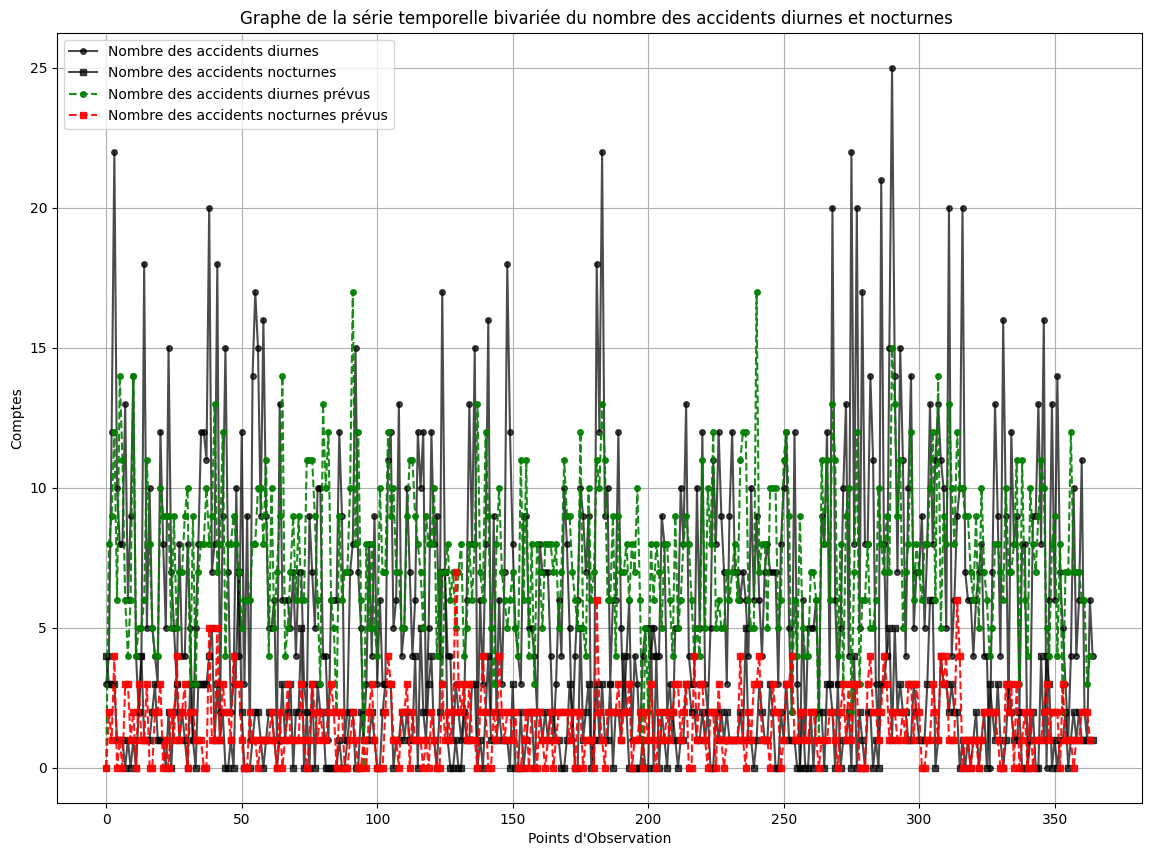

In [52]:
plt.figure(figsize=(14, 10))

# Plot Variable1 with a specific marker and transparency
plt.plot(data1.index, data1['Variable1'], label='Nombre des accidents diurnes', marker='o', linestyle='-', color='black', alpha=0.7, markersize=4)
# Plot Variable2 with a different marker and transparency
plt.plot(data1.index, data1['Variable2'], label='Nombre des accidents nocturnes', marker='s', linestyle='-', color='black', alpha=0.7, markersize=4)

# Plot Variable1 from data2 with different style
plt.plot(data2.index, data2['Variable1'], label='Nombre des accidents diurnes prévus', marker='o', linestyle='--', color='green', alpha=0.9, markersize=4)

# Plot Variable2 from data2 with different style
plt.plot(data2.index, data2['Variable2'], label='Nombre des accidents nocturnes prévus', marker='s', linestyle='--', color='r', alpha=0.9, markersize=4)

# Customize the plot
plt.title('Graphe de la série temporelle bivariée du nombre des accidents diurnes et nocturnes ')
plt.xlabel('Points d\'Observation')
plt.ylabel('Comptes')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


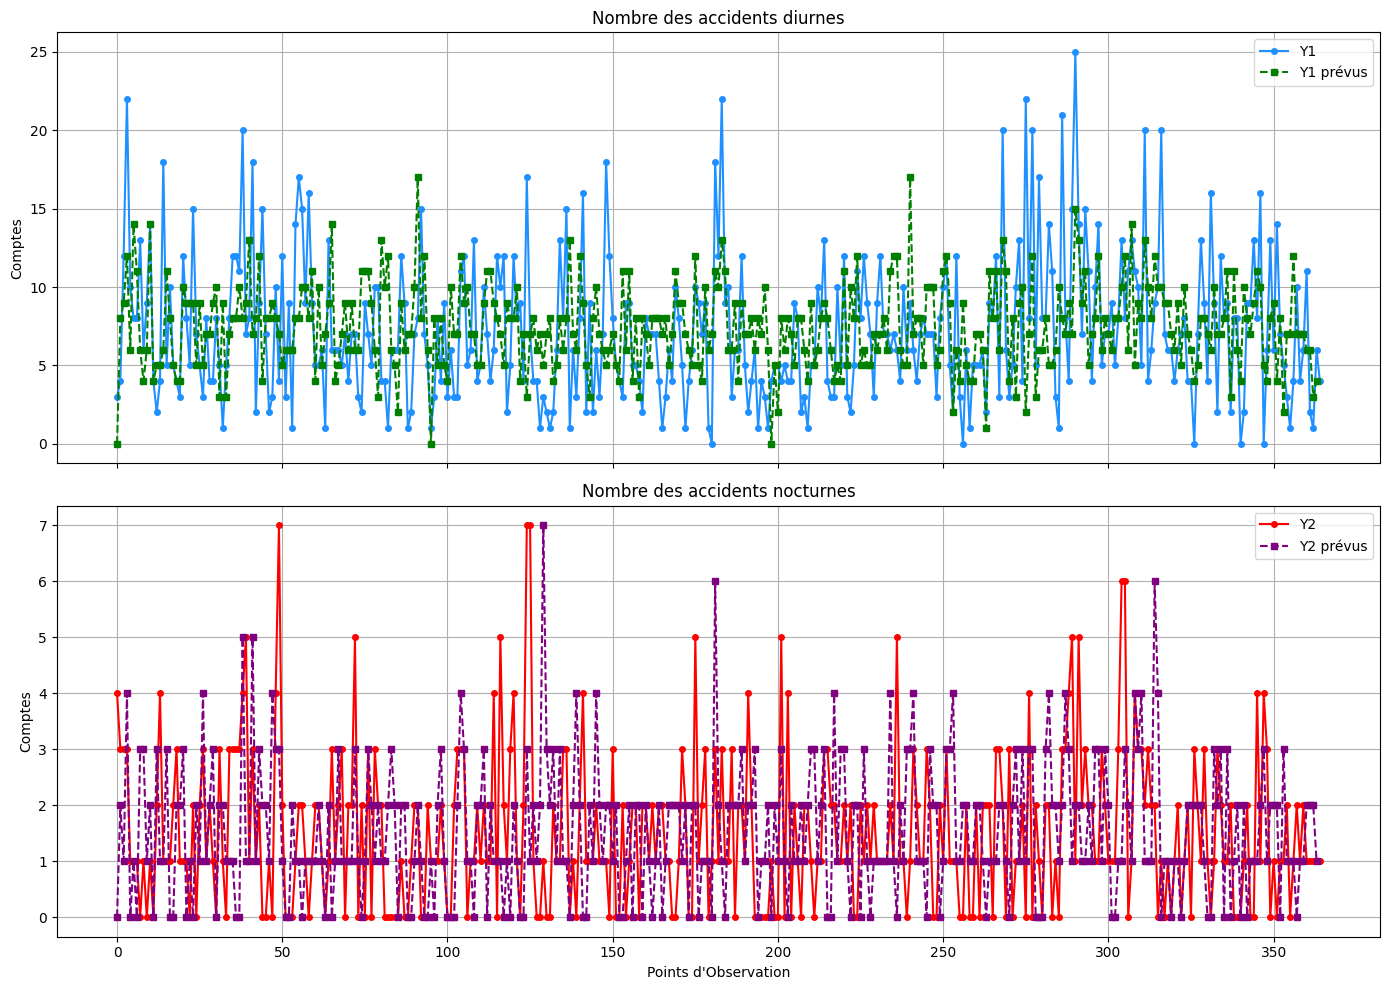

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot Variable1 from data1
axs[0].plot(data1.index, data1['Variable1'], label='Y1', marker='o', linestyle='-', color='dodgerblue', markersize=4)
# Plot Variable1 from data2 on the first subplot
axs[0].plot(data2.index, data2['Variable1'], label='Y1 prévus', marker='s', linestyle='--', color='green', markersize=4)
axs[0].set_title('Nombre des accidents diurnes')
axs[0].set_ylabel('Comptes')
axs[0].grid(True)
axs[0].legend()

# Plot Variable2 from data1
axs[1].plot(data1.index, data1['Variable2'], label='Y2', marker='o', linestyle='-', color='r', markersize=4)
# Plot Variable2 from data2 on the second subplot
axs[1].plot(data2.index, data2['Variable2'], label='Y2 prévus', marker='s', linestyle='--', color='purple', markersize=4)
axs[1].set_title('Nombre des accidents nocturnes')
axs[1].set_xlabel('Points d\'Observation')
axs[1].set_ylabel('Comptes')
axs[1].grid(True)
axs[1].legend()

# Show the plot
plt.tight_layout()
plt.show()

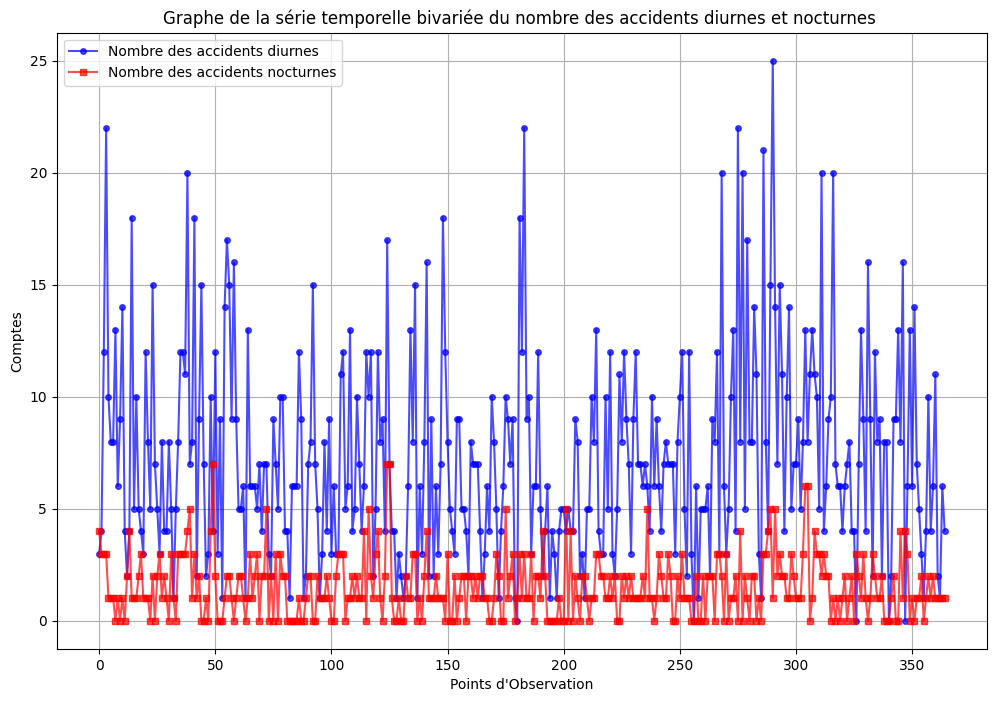

In [6]:
plt.figure(figsize=(12, 8))

# Plot Variable1 with a specific marker and transparency
plt.plot(data1.index, data1['Variable1'], label='Nombre des accidents diurnes', marker='o', linestyle='-', color='b', alpha=0.7, markersize = 4)

# Plot Variable2 with a different marker and transparency
plt.plot(data1.index, data1['Variable2'], label='Nombre des accidents nocturnes', marker='s', linestyle='-', color='r', alpha=0.7, markersize = 4)

# Customize the plot
plt.title('Graphe de la série temporelle bivariée du nombre des accidents diurnes et nocturnes ')
plt.xlabel('Points d\'Observation')
plt.ylabel('Comptes')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

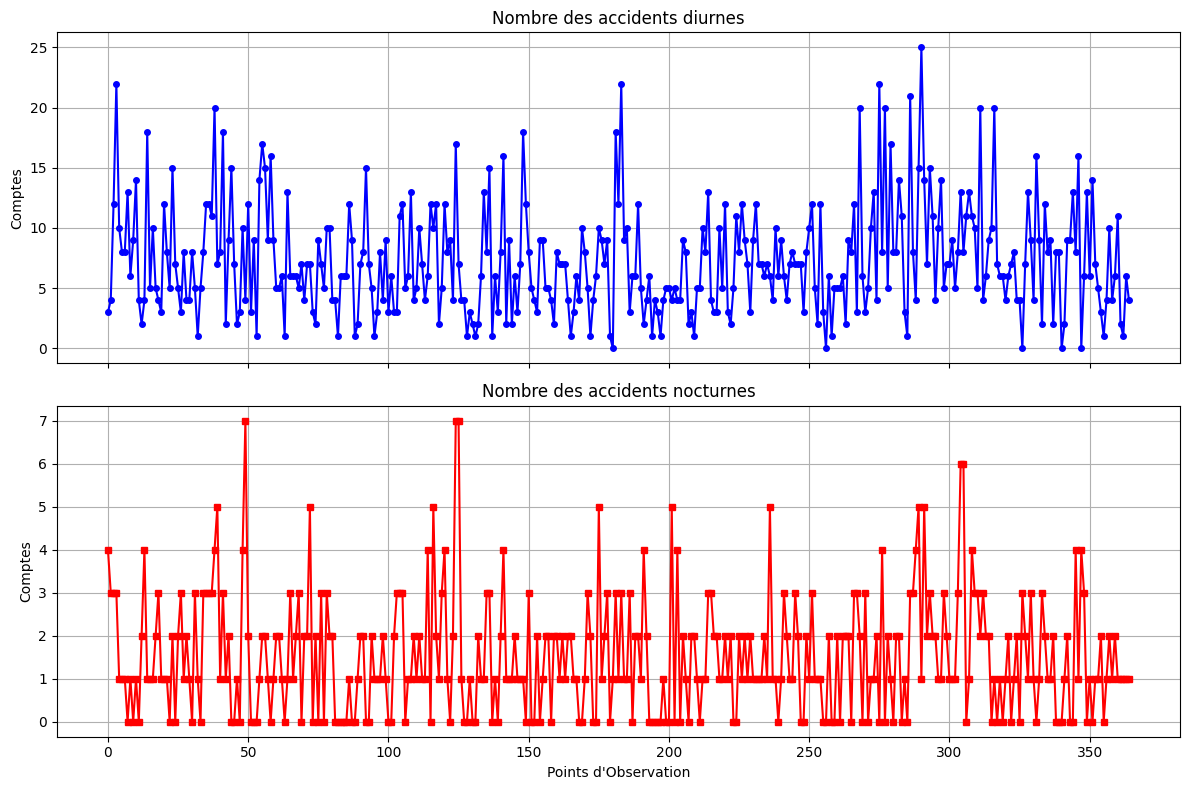

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot Variable1
axs[0].plot(data1.index, data1['Variable1'], label='Y1', marker='o', linestyle='-', color='b', markersize= 4)
axs[0].set_title('Nombre des accidents diurnes')
axs[0].set_ylabel('Comptes')
axs[0].grid(True)

# Plot Variable2
axs[1].plot(data1.index, data1['Variable2'], label='Y2', marker='s', linestyle='-', color='r', markersize= 4)
axs[1].set_title('Nombre des accidents nocturnes')
axs[1].set_xlabel('Points d\'Observation')
axs[1].set_ylabel('Comptes')
axs[1].grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
# Calculate the CCF values
ccf_values = ccf(data['Variable1'], data['Variable2'], adjusted=False)

# Define the number of lags to plot
num_lags = 20
lags = np.arange(num_lags)

# Calculate confidence intervals
conf_interval = 1.96 / np.sqrt(len(data))

# Plot the CCF with confidence intervals
plt.figure(figsize=(10, 4))
plt.stem(lags, ccf_values[:num_lags], linefmt='r-', markerfmt='ro', basefmt='k-')
plt.axhline(y=conf_interval, linestyle='--', color='blue', linewidth=0.5)
plt.axhline(y=-conf_interval, linestyle='--', color='blue', linewidth=0.5)
plt.axhline(y=0, linestyle='-', color='black', linewidth=0.5)
plt.title('Cross-Correlation Function (CCF)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

NameError: name 'data' is not defined

In [ ]:
def plot_acf_pacf(data, title, ax_acf, ax_pacf, lags=20):
    # Calculate ACF and PACF values
    acf_vals = acf(data, nlags=lags)
    pacf_vals = pacf(data, nlags=lags)
    
    # Plot ACF
    ax_acf.stem(range(len(acf_vals)), acf_vals, linefmt='r-', markerfmt='ro', basefmt='k-')
    ax_acf.axhline(y=0, linestyle='-', color='black')
    ax_acf.axhline(y=1.96/len(data)**0.5, linestyle='--', color='blue')
    ax_acf.axhline(y=-1.96/len(data)**0.5, linestyle='--', color='blue')
    ax_acf.set_title(f'ACF for {title}')
    ax_acf.set_xlabel('Lag')
    ax_acf.set_ylabel('ACF')
    
    # Plot PACF
    ax_pacf.stem(range(len(pacf_vals)), pacf_vals, linefmt='r-', markerfmt='ro', basefmt='k-')
    ax_pacf.axhline(y=0, linestyle='-', color='black')
    ax_pacf.axhline(y=1.96/len(data)**0.5, linestyle='--', color='blue')
    ax_pacf.axhline(y=-1.96/len(data)**0.5, linestyle='--', color='blue')
    ax_pacf.set_title(f'PACF for {title}')
    ax_pacf.set_xlabel('Lag')
    ax_pacf.set_ylabel('PACF')

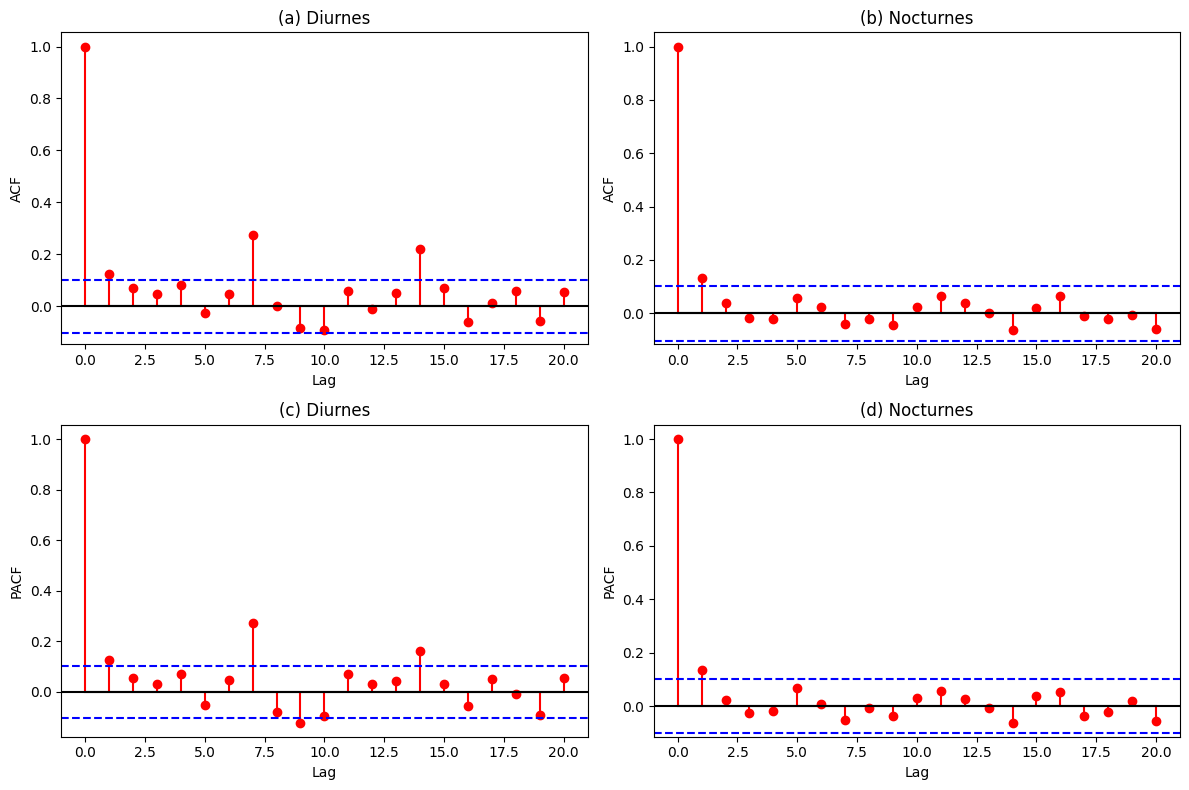

In [9]:
# Plot the ACF and PACF for Variable1 and Variable2
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# ACF and PACF for Variable1
plot_acf_pacf(data['Variable1'], 'Diurne', ax[0, 0], ax[1, 0], lags=20)
ax[0, 0].set_title('(a) Diurnes')
ax[1, 0].set_title('(c) Diurnes')

# ACF and PACF for Variable2
plot_acf_pacf(data['Variable2'], 'Nocturne', ax[0, 1], ax[1, 1], lags=20)
ax[0, 1].set_title('(b) Nocturnes')
ax[1, 1].set_title('(d) Nocturnes')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [11]:
# Create contingency table using pandas
table = pd.crosstab(data['Variable1'], data['Variable2'])
# Display results
print("Contingency Table (pandas):")
print(table)
# Save to CSV file
csv_filename = 'contingency_table.csv' 
table.to_csv(csv_filename, index=True)

print(f"Contingency table saved to '{csv_filename}'")

Contingency Table (pandas):
Variable2   0   1   2  3  4  5  6  7
Variable1                           
0           2   1   0  1  1  0  0  0
1          13   3   3  0  0  0  0  0
2           2   9   7  1  1  0  0  0
3           8   7   7  5  1  0  0  0
4          10  10  12  4  3  1  0  1
5          13   8   9  6  0  0  0  0
6          10  10   9  3  1  1  0  0
7           7  11   8  2  0  2  0  1
8           5  13   6  5  2  0  1  0
9           7  12   6  2  0  0  0  0
10          2   9   3  2  1  2  0  0
11          3   1   1  2  1  0  0  0
12          2   6   5  6  1  0  0  0
13          3   6   0  1  0  0  1  0
14          1   3   1  0  0  1  0  0
15          2   0   2  2  0  1  0  0
16          2   1   0  0  1  0  0  0
17          0   1   1  0  0  0  0  1
18          0   2   0  2  0  0  0  0
20          1   1   2  0  1  0  0  0
21          0   0   0  1  0  0  0  0
22          1   0   0  2  0  0  0  0
25          0   1   0  0  0  0  0  0
Contingency table saved to 'contingency_table.c